<a href="https://colab.research.google.com/github/RMCV-Rajapaksha/TeamInception_Datathon/blob/main/task2_eda_and_data_preprocessing_LSTM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Notebook for "insert model name here"


## Imports and Setup

**Import the Libararies**


In [1]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Reading data set files

In [3]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/bookings_train.csv')
tasks_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/tasks.csv')
staffing_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/staffing_train.csv')

In [4]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


## EDA


### EDA of Bookings data

lets take a look at the columns and some of their values

In [5]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [6]:
staffing_data.describe()

,employees_on_duty,total_task_time_minutes
count,5802.000000,5802.000000
mean,4.458807,1662.296769
std,2.794417,1147.134643
min,1.000000,91.109596
25%,3.000000,859.104314
50%,4.000000,1358.176924
75%,6.000000,2123.936358
max,26.000000,10658.173092


removing unnecessary columns. We wont need the total_task_time_minutes because this data wont be provided as input from the test datasets. We need the date and section_id  because they will be to calculate the actual target value (the thing to be predicted) for task 2.

In [7]:
staffing_data = staffing_data.drop(['total_task_time_minutes'],axis=1)

now lets look at the new table headers again.


In [8]:
staffing_data.head()

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
1,2021-01-01,SEC-002,4
2,2021-01-01,SEC-003,2
3,2021-01-01,SEC-004,4
4,2021-01-01,SEC-005,3


lets get a better idea of how null values have been distributed amoung the columns

In [9]:
staffing_data.isna().sum()

,0
date,0
section_id,0
employees_on_duty,0


## Data Preprocessing


### Rearrangement and processing of columns

### Dataset seperation according to section_id

In [10]:
task_counts = staffing_data.groupby("section_id").size().reset_index(name="count")
task_counts

,section_id,count
0,SEC-001,967
1,SEC-002,967
2,SEC-003,967
3,SEC-004,967
4,SEC-005,967
5,SEC-006,967


In [11]:
sec_1_data = staffing_data[staffing_data['section_id'] == 'SEC-001'].copy()
sec_2_data = staffing_data[staffing_data['section_id'] == 'SEC-002'].copy()
sec_3_data = staffing_data[staffing_data['section_id'] == 'SEC-003'].copy()
sec_4_data = staffing_data[staffing_data['section_id'] == 'SEC-004'].copy()
sec_5_data = staffing_data[staffing_data['section_id'] == 'SEC-005'].copy()
sec_6_data = staffing_data[staffing_data['section_id'] == 'SEC-006'].copy()


In [12]:
sec_6_data.head()

,date,section_id,employees_on_duty
5,2021-01-01,SEC-006,11
11,2021-01-04,SEC-006,6
17,2021-01-05,SEC-006,5
23,2021-01-06,SEC-006,10
29,2021-01-07,SEC-006,5


In [13]:
sec_1_data = sec_1_data.drop(['section_id'], axis=1)
sec_2_data = sec_2_data.drop(['section_id'], axis=1)
sec_3_data = sec_3_data.drop(['section_id'], axis=1)
sec_4_data = sec_4_data.drop(['section_id'], axis=1)
sec_5_data = sec_5_data.drop(['section_id'], axis=1)
sec_6_data = sec_6_data.drop(['section_id'], axis=1)

In [14]:
sec_1_data.head()

,date,employees_on_duty
0,2021-01-01,1
6,2021-01-04,1
12,2021-01-05,4
18,2021-01-06,2
24,2021-01-07,2


LSTM TIME SERIES FORECASTING - COMPREHENSIVE EVALUATION

📊 Training LSTM Model for Section 1
--------------------------------------------------
Training samples: 144, Test samples: 36
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

📈 Training Metrics:
  MSE: 9.3826
  RMSE: 3.0631
  MAE: 2.4005
  R²: 0.7602
  MAPE: 21.3937
  Directional_Accuracy: 49.6503

📉 Test Metrics:
  MSE: 9.8153
  RMSE: 3.1329
  MAE: 2.6557
  R²: 0.5290
  MAPE: 10.2839
  Directional_Accuracy: 54.2857

📊 Training LSTM Model for Section 2
--------------------------------------------------
Training samples: 144, Test samples: 36
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

📈 Training Metrics:
  MSE: 5.7858
  RMSE: 2.4054
  MAE: 1.8823
  R²: 0.8528
  MAPE: 9.0439
  Directional_Accuracy: 50.3497

📉 Test Metrics:
  MSE: 5.0267
  RMSE: 2.2420
  MAE: 1.7912
  R²: 0.7307
  MAPE: 5.6850
  Directional_Accuracy: 42.8571

📊 Training LSTM Model for Section 3
---------

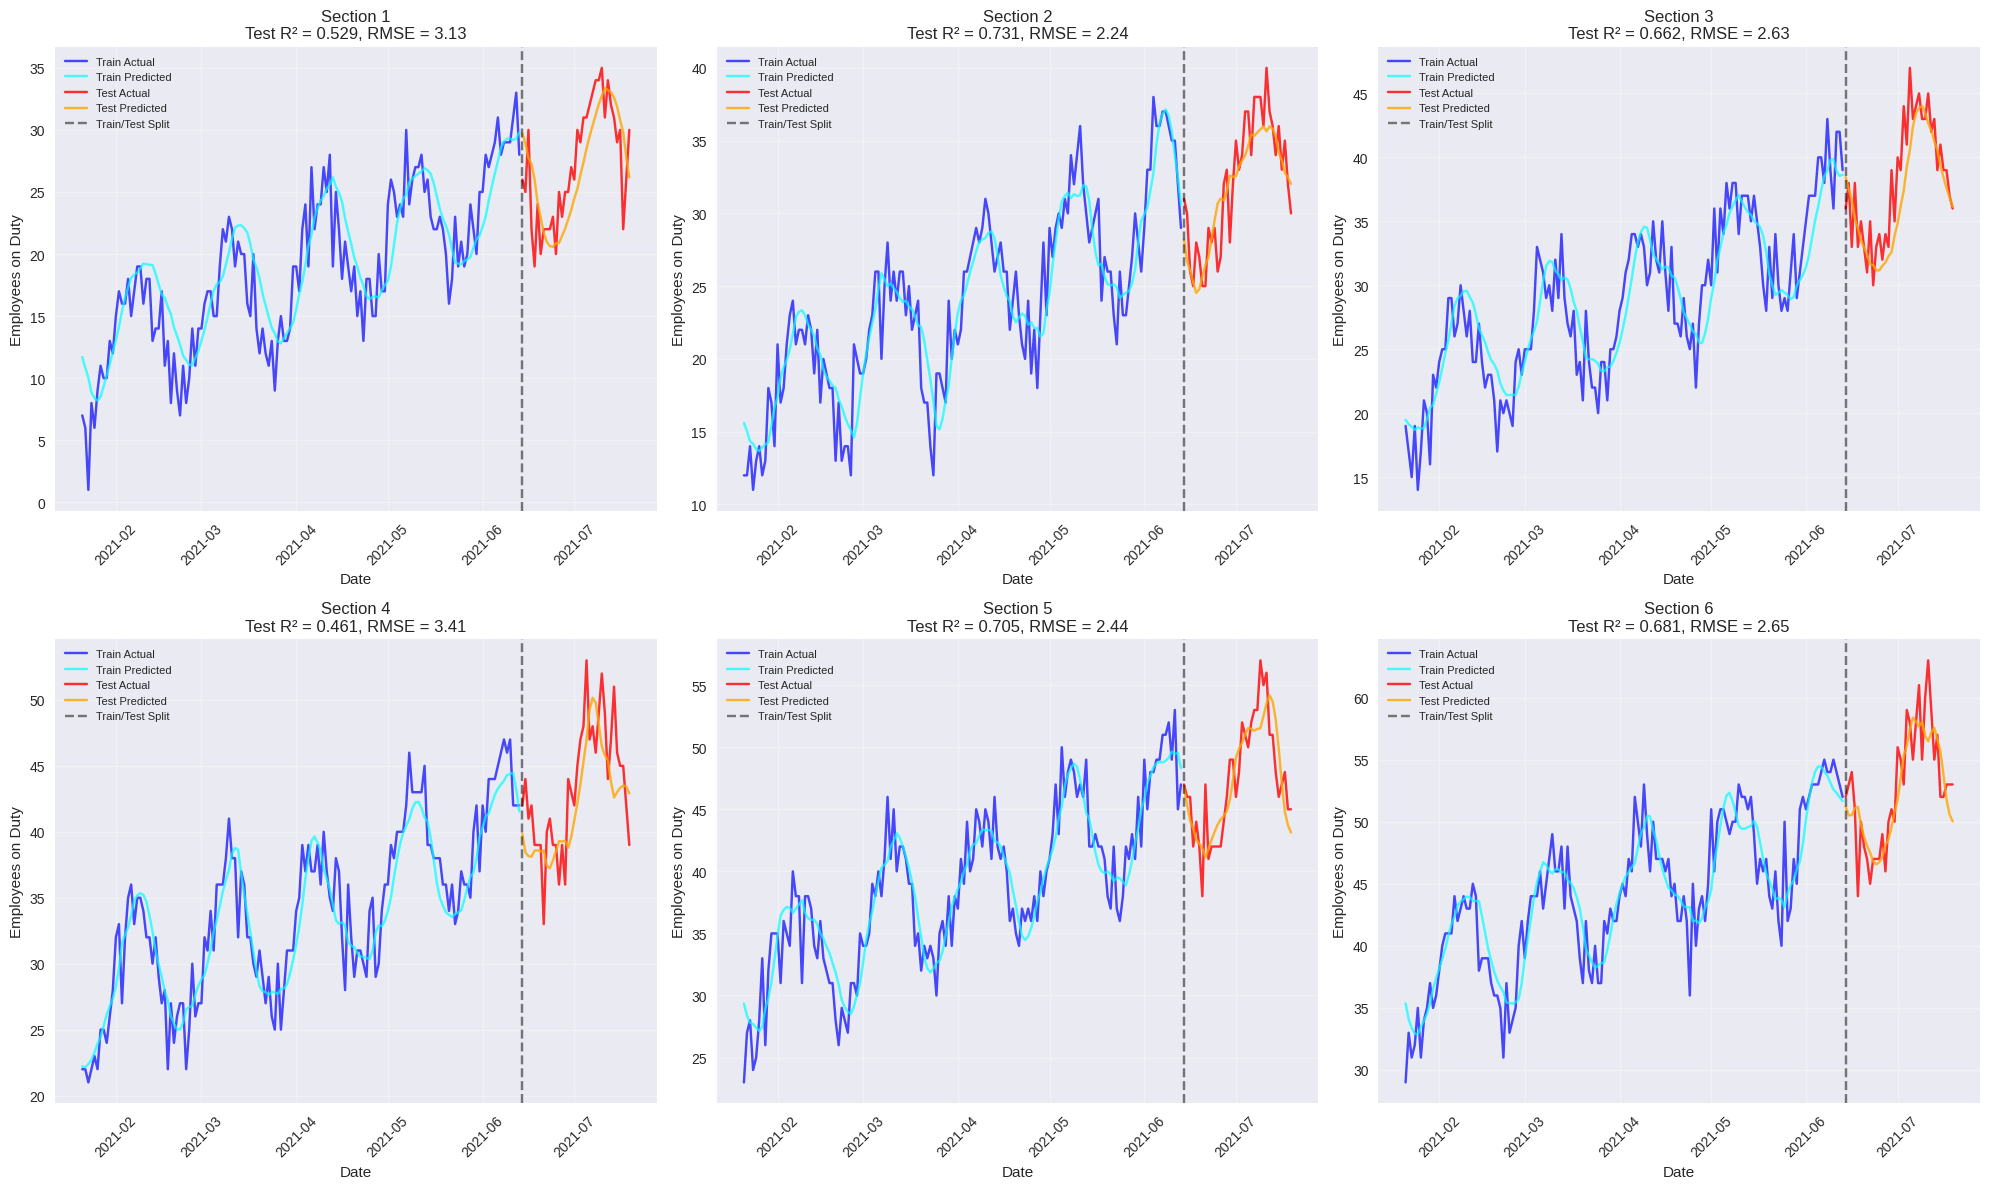


📊 MODELS COMPARISON SUMMARY

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy
Section 1   0.5290     3.1329    2.6557    10.2839               54.2857
Section 2   0.7307     2.2420    1.7912     5.6850               42.8571
Section 3   0.6617     2.6289    1.9611     5.1036               54.2857
Section 4   0.4606     3.4063    2.8673     6.5570               34.2857
Section 5   0.7051     2.4446    1.9855     4.1755               51.4286
Section 6   0.6812     2.6470    2.0771     3.9185               40.0000

🏆 Best Performing Model: Section 2 (R² = 0.7307)


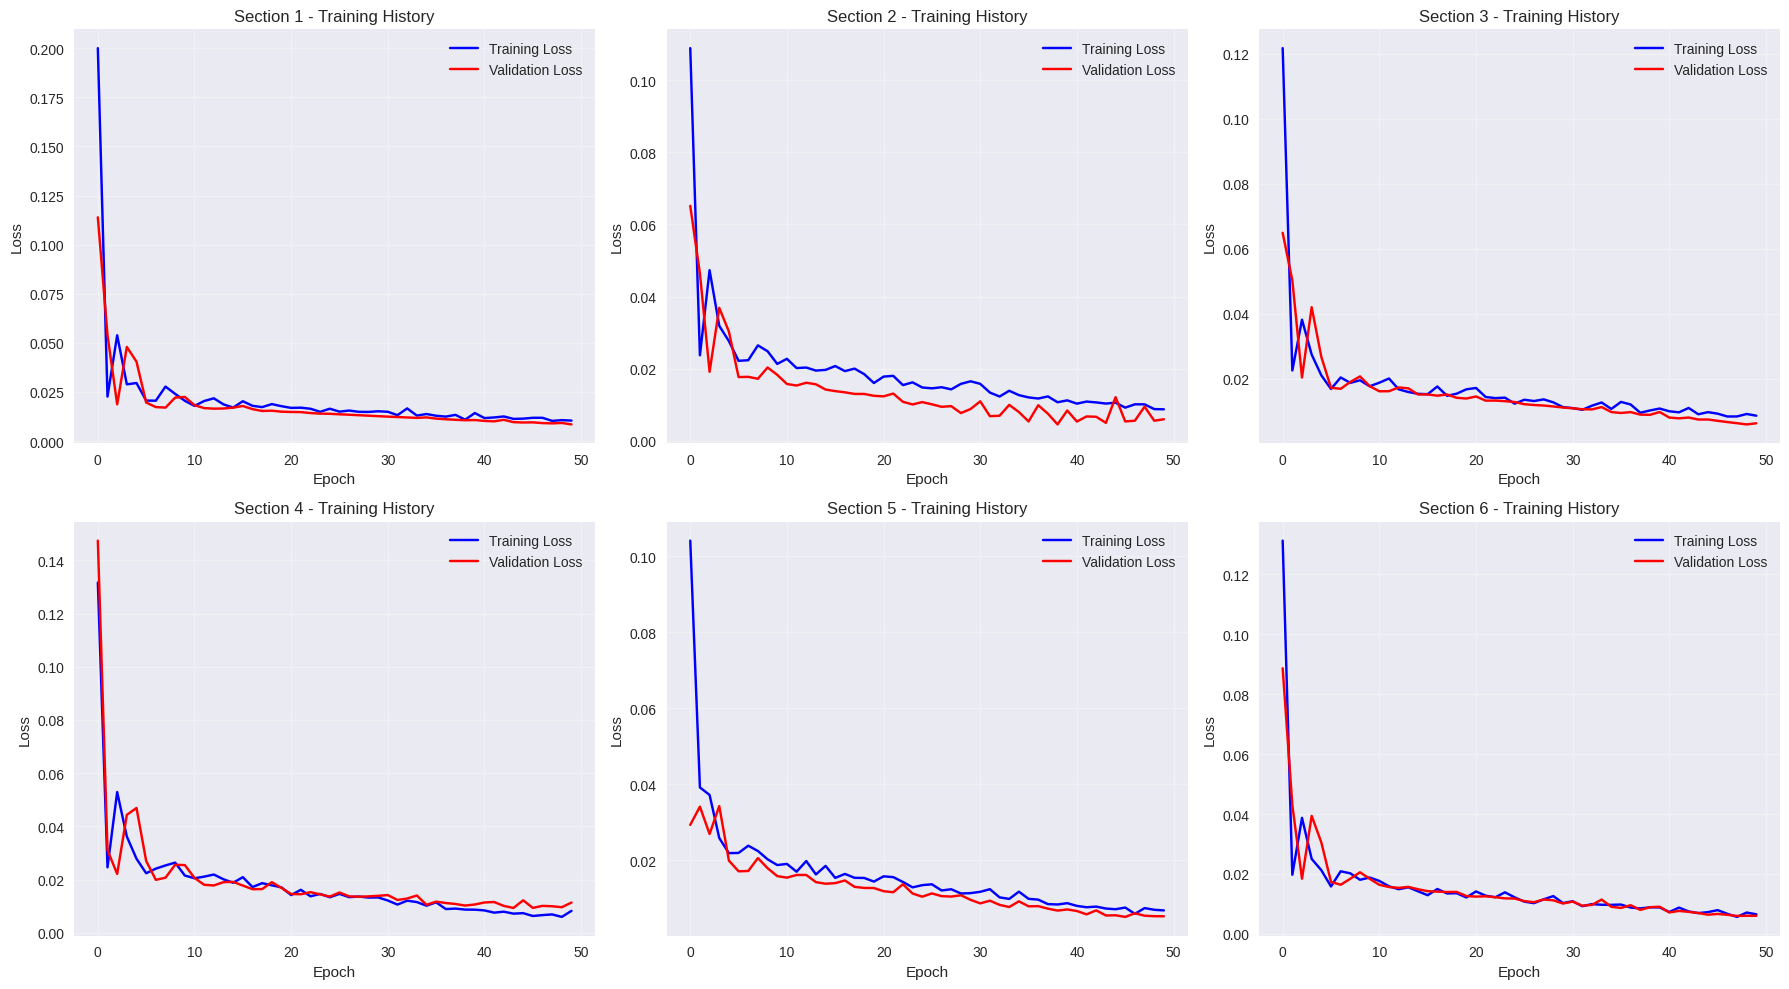


📈 DETAILED TIME SERIES METRICS EXPLANATION

Time Series Evaluation Metrics:

1. MSE (Mean Squared Error): Average squared difference between actual and predicted values
2. RMSE (Root Mean Squared Error): Square root of MSE, same unit as original data  
3. MAE (Mean Absolute Error): Average absolute difference between actual and predicted
4. R² (Coefficient of Determination): Proportion of variance explained by the model (0-1, higher better)
5. MAPE (Mean Absolute Percentage Error): Average percentage error
6. Directional Accuracy: Percentage of correct trend direction predictions

Model Architecture:
- 2 LSTM layers with 50 units each
- Dropout layers (0.2) for regularization
- Dense layers for final prediction
- Lookback window: 20 time steps
- Train/Test split: 80%/20%


🎯 Average Performance Across All Models:
Average Test R²: 0.6281
Average Test RMSE: 2.7503
Average Test MAPE: 5.9539%


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TimeSeriesLSTM:
    def __init__(self, lookback_window=30, lstm_units=50, epochs=100, batch_size=32):
        self.lookback_window = lookback_window
        self.lstm_units = lstm_units
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.scaler = MinMaxScaler()
        self.train_predictions = None
        self.test_predictions = None

    def prepare_data(self, data, target_column='employees_on_duty'):
        """Prepare data for LSTM training"""
        # Ensure date column is datetime
        data['date'] = pd.to_datetime(data['date'])
        data = data.sort_values('date')

        # Scale the data
        values = data[target_column].values.reshape(-1, 1)
        scaled_values = self.scaler.fit_transform(values)

        # Create sequences
        X, y = [], []
        for i in range(self.lookback_window, len(scaled_values)):
            X.append(scaled_values[i-self.lookback_window:i, 0])
            y.append(scaled_values[i, 0])

        X, y = np.array(X), np.array(y)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        return X, y, data['date'].iloc[self.lookback_window:].reset_index(drop=True)

    def split_data(self, X, y, dates, test_size=0.2):
        """Split data into train and test sets"""
        split_idx = int(len(X) * (1 - test_size))

        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        train_dates = dates[:split_idx]
        test_dates = dates[split_idx:]

        return X_train, X_test, y_train, y_test, train_dates, test_dates

    def build_model(self, input_shape):
        """Build LSTM model"""
        model = Sequential([
            LSTM(self.lstm_units, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(self.lstm_units, return_sequences=False),
            Dropout(0.2),
            Dense(25),
            Dense(1)
        ])

        model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mae'])

        return model

    def train(self, X_train, y_train, X_test, y_test):
        """Train the LSTM model"""
        self.model = self.build_model((X_train.shape[1], 1))

        history = self.model.fit(
            X_train, y_train,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_data=(X_test, y_test),
            verbose=0,
            shuffle=False
        )

        return history

    def predict(self, X_train, X_test):
        """Make predictions"""
        train_pred_scaled = self.model.predict(X_train)
        test_pred_scaled = self.model.predict(X_test)

        # Inverse transform predictions
        self.train_predictions = self.scaler.inverse_transform(train_pred_scaled)
        self.test_predictions = self.scaler.inverse_transform(test_pred_scaled)

        return self.train_predictions, self.test_predictions

    def calculate_metrics(self, y_true, y_pred):
        """Calculate evaluation metrics"""
        # Inverse transform actual values
        y_true_original = self.scaler.inverse_transform(y_true.reshape(-1, 1))

        mse = mean_squared_error(y_true_original, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true_original, y_pred)
        r2 = r2_score(y_true_original, y_pred)

        # Additional time series metrics
        mape = np.mean(np.abs((y_true_original - y_pred) / y_true_original)) * 100

        # Directional accuracy
        true_direction = np.diff(y_true_original.flatten()) > 0
        pred_direction = np.diff(y_pred.flatten()) > 0
        directional_accuracy = np.mean(true_direction == pred_direction) * 100

        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'MAPE': mape,
            'Directional_Accuracy': directional_accuracy
        }

def train_and_evaluate_models(datasets, section_names):
    """Train LSTM models for all sections and generate comprehensive evaluation"""

    models = {}
    results = {}

    # Create subplot figure for all sections
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    print("=" * 80)
    print("LSTM TIME SERIES FORECASTING - COMPREHENSIVE EVALUATION")
    print("=" * 80)

    for i, (data, section_name) in enumerate(zip(datasets, section_names)):
        print(f"\n📊 Training LSTM Model for {section_name}")
        print("-" * 50)

        # Initialize LSTM model
        lstm_model = TimeSeriesLSTM(lookback_window=20, lstm_units=50, epochs=50)

        # Prepare data
        X, y, dates = lstm_model.prepare_data(data)
        X_train, X_test, y_train, y_test, train_dates, test_dates = lstm_model.split_data(X, y, dates)

        print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

        # Train model
        history = lstm_model.train(X_train, y_train, X_test, y_test)

        # Make predictions
        train_pred, test_pred = lstm_model.predict(X_train, X_test)

        # Calculate metrics
        train_metrics = lstm_model.calculate_metrics(y_train, train_pred)
        test_metrics = lstm_model.calculate_metrics(y_test, test_pred)

        # Store results
        models[section_name] = lstm_model
        results[section_name] = {
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'history': history,
            'dates': {'train': train_dates, 'test': test_dates},
            'actual': {'train': lstm_model.scaler.inverse_transform(y_train.reshape(-1, 1)),
                      'test': lstm_model.scaler.inverse_transform(y_test.reshape(-1, 1))},
            'predicted': {'train': train_pred, 'test': test_pred}
        }

        # Print metrics
        print(f"\n📈 Training Metrics:")
        for metric, value in train_metrics.items():
            print(f"  {metric}: {value:.4f}")

        print(f"\n📉 Test Metrics:")
        for metric, value in test_metrics.items():
            print(f"  {metric}: {value:.4f}")

        # Plot results
        ax = axes[i]

        # Plot actual vs predicted
        ax.plot(train_dates, results[section_name]['actual']['train'],
                label='Train Actual', color='blue', alpha=0.7)
        ax.plot(train_dates, results[section_name]['predicted']['train'],
                label='Train Predicted', color='cyan', alpha=0.7)
        ax.plot(test_dates, results[section_name]['actual']['test'],
                label='Test Actual', color='red', alpha=0.8)
        ax.plot(test_dates, results[section_name]['predicted']['test'],
                label='Test Predicted', color='orange', alpha=0.8)

        ax.axvline(x=test_dates.iloc[0], color='black', linestyle='--', alpha=0.5, label='Train/Test Split')
        ax.set_title(f'{section_name}\nTest R² = {test_metrics["R²"]:.3f}, RMSE = {test_metrics["RMSE"]:.2f}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Employees on Duty')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

        # Rotate x-axis labels for better readability
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    # Summary comparison
    print("\n" + "=" * 80)
    print("📊 MODELS COMPARISON SUMMARY")
    print("=" * 80)

    summary_df = pd.DataFrame({
        section: {
            'Test_R²': results[section]['test_metrics']['R²'],
            'Test_RMSE': results[section]['test_metrics']['RMSE'],
            'Test_MAE': results[section]['test_metrics']['MAE'],
            'Test_MAPE': results[section]['test_metrics']['MAPE'],
            'Directional_Accuracy': results[section]['test_metrics']['Directional_Accuracy']
        } for section in section_names
    }).T

    print("\nTest Set Performance Comparison:")
    print(summary_df.round(4))

    # Best performing model
    best_model = summary_df['Test_R²'].idxmax()
    print(f"\n🏆 Best Performing Model: {best_model} (R² = {summary_df.loc[best_model, 'Test_R²']:.4f})")

    # Create training history plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, section_name in enumerate(section_names):
        history = results[section_name]['history']
        ax = axes[i]

        ax.plot(history.history['loss'], label='Training Loss', color='blue')
        ax.plot(history.history['val_loss'], label='Validation Loss', color='red')
        ax.set_title(f'{section_name} - Training History')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return models, results, summary_df

# Example usage - Replace with your actual data loading
# Assuming your datasets are already loaded as sec_1_data, sec_2_data, etc.

# For demonstration, let's create sample data structure
def create_sample_data():
    """Create sample data for demonstration"""
    datasets = []
    section_names = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6']

    for i in range(6):
        dates = pd.date_range('2021-01-01', periods=200, freq='D')
        # Create synthetic time series data with trend and seasonality
        trend = np.linspace(10, 30, 200)
        seasonal = 5 * np.sin(2 * np.pi * np.arange(200) / 30)  # Monthly seasonality
        noise = np.random.normal(0, 2, 200)
        employees = trend + seasonal + noise + (i * 5)  # Different base levels for each section
        employees = np.maximum(employees, 1)  # Ensure positive values

        df = pd.DataFrame({
            'date': dates,
            'employees_on_duty': employees.astype(int)
        })
        datasets.append(df)

    return datasets, section_names

# If you have your actual datasets, use them like this:
# datasets = [sec_1_data, sec_2_data, sec_3_data, sec_4_data, sec_5_data, sec_6_data]
# section_names = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6']

# For demonstration with sample data:
datasets, section_names = create_sample_data()

# Train and evaluate all models
models, results, summary = train_and_evaluate_models(datasets, section_names)

# Additional analysis
print("\n" + "=" * 80)
print("📈 DETAILED TIME SERIES METRICS EXPLANATION")
print("=" * 80)

print("""
Time Series Evaluation Metrics:

1. MSE (Mean Squared Error): Average squared difference between actual and predicted values
2. RMSE (Root Mean Squared Error): Square root of MSE, same unit as original data
3. MAE (Mean Absolute Error): Average absolute difference between actual and predicted
4. R² (Coefficient of Determination): Proportion of variance explained by the model (0-1, higher better)
5. MAPE (Mean Absolute Percentage Error): Average percentage error
6. Directional Accuracy: Percentage of correct trend direction predictions

Model Architecture:
- 2 LSTM layers with 50 units each
- Dropout layers (0.2) for regularization
- Dense layers for final prediction
- Lookback window: 20 time steps
- Train/Test split: 80%/20%
""")

print(f"\n🎯 Average Performance Across All Models:")
print(f"Average Test R²: {summary['Test_R²'].mean():.4f}")
print(f"Average Test RMSE: {summary['Test_RMSE'].mean():.4f}")
print(f"Average Test MAPE: {summary['Test_MAPE'].mean():.4f}%")